In [1]:
%config InlineBackend.figure_formats = {"retina", "png"}
%matplotlib inline

In [2]:
import os

os.environ["OPENBLAS_NUM_THREADS"] = "1"
import tempfile

from IPython.display import HTML, display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py

import tdgl
from tdgl.geometry import box, circle

tempdir = tempfile.TemporaryDirectory(dir=os.getcwd())

# Definición del dispositivo a usar

In [3]:
length_units = "nm"

coherence_length = 0.5
london_lambda = 2
d = 0.1
gamma = 1

layer = tdgl.Layer(london_lambda=london_lambda, coherence_length=coherence_length, thickness=d, gamma=gamma)

total_width = 2260
total_length = 987
link_width = total_width / 3

# muescas externas
square_hole = (
    tdgl.Polygon(points=box(190, 101)).
    translate(dy = -(total_length - 101)/2)
)

x = total_width / 2
y = total_length / 2
points = [(-x, y), (-x + 640, y), (-x + 640, y - 170), (-x + 340, y - 400), (-x, y - 400), (-x, y)]
top_left_notch = (tdgl.Polygon(points=points))

bottom_left_notch = top_left_notch.scale(yfact=-1)
top_right_notch = top_left_notch.scale(xfact=-1, yfact=1)
bottom_right_notch = top_left_notch.scale(xfact=-1, yfact=-1)

upper_center_notch = (
    tdgl.Polygon(points=box(164))
    .rotate(45)
    .translate(dy = y + 46)
)

film = (
    tdgl.Polygon("film", points=box(total_width, total_length))
    .difference(square_hole, upper_center_notch, top_right_notch, bottom_right_notch, top_left_notch, bottom_left_notch)
    .resample(401)
    .buffer(0)
)

dy = -y + 101 + 90 + 123/2
x = -190/2 - 80
y = dy + 123/2
w = 190 + 160
a = 72*np.pi/180

pentagon_points = [
    (x, y),
    (x - w*np.cos(a), y + w*np.sin(a)),
    (0, y + w*np.sin(a) + w*np.sin(36*np.pi/180)),
    (x + w + w*np.sin(18*np.pi/180), y + w*np.sin(a)),
    (x + w, y),
    (x,y)]

pentagon_hole = (
    tdgl.Polygon("square_hole", points=box(190, 123)).
    translate(dy = dy)
).union(
    tdgl.Polygon(points=pentagon_points)
)

source = (
    tdgl.Polygon("source", points=box(total_width / 100, 0.1*total_length))
    .translate(dx = -total_width / 2)
)

drain = source.scale(xfact=-1).set_name("drain")

probe_points = [(-600,0),(600,0)]


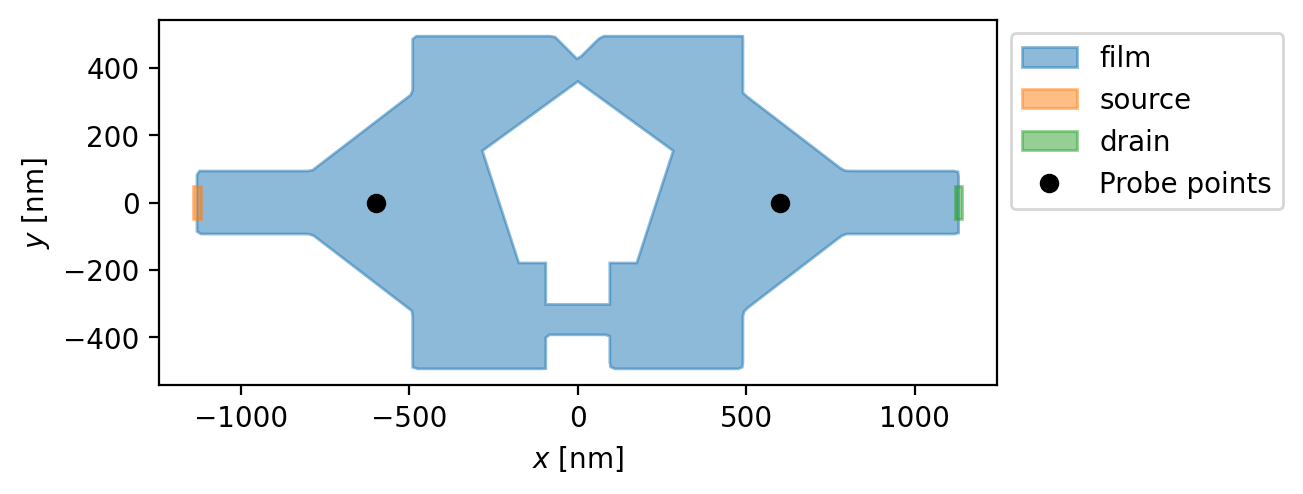

In [4]:
device = tdgl.Device(
    "diode",
    layer=layer,
    film=film,
    holes=[pentagon_hole],
    length_units=length_units,
    terminals=[source, drain],
    probe_points=probe_points,
)

fix, ax = device.draw()

In [ ]:
device.make_mesh(max_edge_length= coherence_length/2, smooth=100)

fig, ax = device.plot(mesh=True, legend=True, figsize=(9,4))

ax.set_xlabel("x [nm]",fontsize="14")
ax.set_ylabel("y [nm]",fontsize="14")
ax.tick_params(axis="both", labelsize=14)